# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:130%;text-align:center;border-radius:20px 70px;">Message Classifier : SPAM or HAM</p>

###  <span style="color:#4e6460"> CSIS4260 Term Project by:
<span style="color:#627D78"> 
Student Name: DuyKhanh Nguyen <br>
Student ID: 300316520 <br>

Student Name: Shringar Prakash <br>
Student ID: 300356399 <br>

**Dataset:** https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

**About the Dataset:** This is a text corpus of over 5,500 English short messages. The text file contains one message per line with two columns: the label ("ham" or "spam") and the raw text of the message. Messages labeled as "ham" are non-spam messages that can be considered legitimate.

**Objective of the Project**: Scammers send fake text messages to trick us into giving them personal information like passwords, account numbers, or Social Security numbers. If they get that information, they could gain access to our email, bank, or other accounts. Or they could sell the information to other scammers. Other messages might install harmful malware on our phones that steals personal or financial information without us realizing it. <br>
The aim of the project is to create an automatic system where we can distinguish between spam and regular messages accurately. By using several classification techniques we will segregate messages into SPAM or HAM labels and also discover the most common words in spam versus normal messages through visualizations. </span>


## <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:130%;text-align:center;border-radius:20px 70px;">1. Importing Libraries </p>

In [1]:
# Loading required libraries
# Data Manupilation
import pandas as pd
import numpy as np
import re
import string

# Data Visualization
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from wordcloud import WordCloud


# nltk used for NLP
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Text Preprocessing (sklearn)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Classification Models
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
import itertools

# Performance Metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, RocCurveDisplay

# Seeding
from numpy.random import seed
seed(0)

plt.style.use('seaborn')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xaosp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xaosp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\xaosp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:130%;text-align:center;border-radius:20px 70px;">2. Loading Data </p>

In [2]:
# Loading the data
df = pd.read_csv('Datasets/Uncleaned_Messages_1.csv')
df

Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [3]:
# Checking for null values
df.isnull().sum().sum()

0

## <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:130%;text-align:center;border-radius:20px 70px;">3. Exploratory Data Analysis </p>

In [4]:
# Counting the Number of Words on each Ham Message
df_ham = df.loc[df["Category"] == "ham"]
df_ham["Number_of_Words"] = df_ham["Message"].str.len()
df_ham.sort_values(by= "Number_of_Words", ascending = False)

Category                                            Message  \
1085      ham  For me the love should start with attraction.i...   
1863      ham  The last thing i ever wanted to do was hurt yo...   
2434      ham  Indians r poor but India is not a poor country...   
1579      ham  How to Make a girl Happy? It's not at all diff...   
2158      ham  Sad story of a Man - Last week was my b'day. M...   
...       ...                                                ...   
5357      ham                                                 Ok   
1925      ham                                                 Ok   
4498      ham                                                 Ok   
3376      ham                                                 :)   
3051      ham                                                 Ok   

      Number_of_Words  
1085              910  
1863              790  
2434              629  
1579              611  
2158              588  
...               ...  
5357                2  
1925                2  
4498                2  
3376                2  
3051                2  

[4825 rows x 3 columns]

In [5]:
# Counting the Number of Words on each Spam Message
df_spam = df.loc[df["Category"] == "spam"]
df_spam["Number_of_Words"] = df_spam["Message"].str.len()
df_spam.sort_values(by = "Number_of_Words", ascending = False)

Category                                            Message  \
1734     spam  Hi, this is Mandy Sullivan calling from HOTMIX...   
3720     spam  Thanks for your ringtone order, reference numb...   
2297     spam  <Forwarded from 21870000>Hi - this is your Mai...   
4906     spam  Warner Village 83118 C Colin Farrell in SWAT t...   
2247     spam  Hi ya babe x u 4goten bout me?' scammers getti...   
...       ...                                                ...   
3981     spam                                 ringtoneking 84484   
3742     spam                                      2/2 146tf150p   
505      spam                                            #ERROR!   
2124     spam                                            #ERROR!   
717      spam                                            #ERROR!   

      Number_of_Words  
1734              223  
3720              197  
2297              183  
4906              181  
2247              181  
...               ...  
3981               18  
3742               13  
505                 7  
2124                7  
717                 7  

[747 rows x 3 columns]

Text(0, 0.5, 'Frequency')

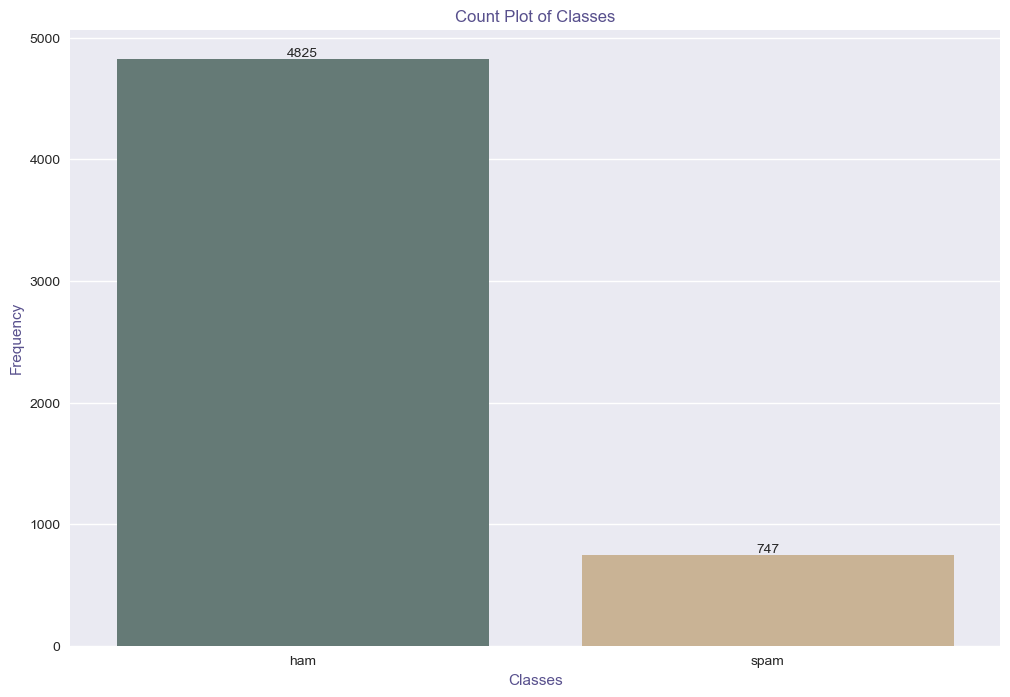

In [6]:
# Displaying the distrubtion of the classes in the dataframe
cols= ["#627D78", "#d2b48c"] 
plt.figure(figsize=(12,8))
fg = sns.countplot(x= df["Category"], palette= cols)
abs_values = df['Category'].value_counts(ascending=False).values
fg.bar_label(container=fg.containers[0], labels=abs_values)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Frequency", color="#58508d")

In [7]:
# Adding a column of numbers of charachters,words and sentences in each msg
df["Total Characters"] = df["Message"].apply(len)
df["Total Words"]=df.apply(lambda row: nltk.word_tokenize(row["Message"]), axis=1).apply(len)
df["Total Sentences"]=df.apply(lambda row: nltk.sent_tokenize(row["Message"]), axis=1).apply(len)

df.describe().T

count       mean        std  min    25%   50%    75%    max
Total Characters  5572.0  80.368988  59.926946  2.0  35.75  61.0  122.0  910.0
Total Words       5572.0  18.823223  13.854300  1.0   9.00  15.0   27.0  220.0
Total Sentences   5572.0   1.977207   1.422573  1.0   1.00   1.0    2.0   28.0

<Figure size 1200x800 with 0 Axes>

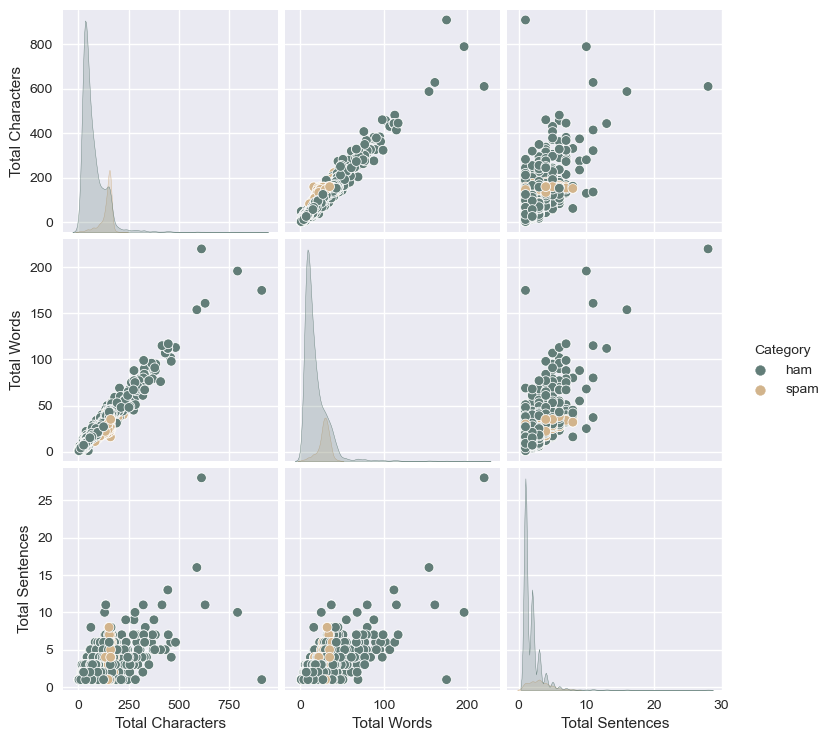

In [8]:
# Plotting the new columns added to the dataframe
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=df, hue="Category",palette=cols)
plt.show(fg)

In [9]:
# Dropping columns created in this section for EDA
df.drop(columns=["Total Characters", "Total Words", "Total Sentences"], inplace = True)
df.head(1)

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...

## <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:130%;text-align:center;border-radius:20px 70px;">4. Text Preprocessing </p>

<span style="color:#4e6460"> 
Data usually comes from a variety of sources and often in different formats. For this reason, transforming the raw data is essential. However, this transformation is not a simple process, as text data often contain redundant and repetitive words. This means that processing the text data is the first step in the solution. <br>

The fundamental steps involved in text preprocessing are: <br>
A. Cleaning the raw data <br>
B. Tokenizing the cleaned data </span>

<span style="color:#4e6460"> 

A. Cleaning the raw data: The data cleaning process Natural Language Processing is crucial. The machine does not understand the text. For the machine, it is only a cluster of symbols. To further process the data we need to clean the data.

This phase involves the deletion of words or characters that do not add value to the meaning of the text. Some of the standard cleaning steps are listed below:

- Lowering case
- Removal of special characters/punctuations
- Removal of new line
- Removal of hyperlinks
- Removal of numbers
- Removal of whitespaces

This text will then be used in further processing.

<span style="color:#4e6460"> 
B. Tokenizing the cleaned data: <br>
- Tokenization: Here we decompose the text data into the smallest unit called tokens. The dataset consists long messagees which is made up of many lines and lines are made up of words. It is quite difficult to analyze the long message so first, we decompose the paragraphs into separate lines and then lines are decomposed into words. <br>
- Lemmatization: Here the word that is generated after chopping off the suffix is always meaningful and belongs to the dictionary that means it does not produce any incorrect word. The word generated after lemmatization is also called a lemma. <br>
- Stop-words: Words in any language that helps to combine the sentence and make it meaningful are know as Stop-words. In the English language various words like I, am, are, is to, etc. are all known as stop-words. But these stop-words are not very useful for the model so there is a need to remove these stop-words from the dataset so that we can focus on only important words rather than these supporting words.

In [10]:
# function to get all of strings from dataframe column, and used lower function here.
def get_all_str(df):
    sentence = ''
    for i in range(len(df)):
        sentence += df['Message'][i]
    sentence = sentence.lower()
    return sentence

def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence

# function to get words from text(string). used RegexpTokenizer
def get_word(text): 
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
#     result = result.lower()                                              
#     result = nltk.word_tokenize(text)
    return result

# function to add stopwords to nltp stopword list.
def stopword_list(stop):
    lst = stopwords.words('english')
    for stopword in stop:
        lst.append(stopword)
    return lst

# function to remove stopwords from list.
def remove_stopword(words):
    cleanwordlist = [i for i in words if i not in ENGLISH_STOP_WORDS]
    return cleanwordlist

# function to lemmatize words
def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
    return tokens

# function to remove hyperlink in message content
def remove_hyperlink(text):
    return re.sub(r"http\S+", "", text)

# function to remove number in message content, since number does not determine spam or not
def remove_number(text):
    result = re.sub(r'\d+', '', text)
    return result

# function to remove whitespace
def remove_whitespace(word):
    result = word.strip()
    return result

# function to remove newline
def remove_newline(text):
    return text.replace("\n", "")

# function to remove punctuation
def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

# function to get frequency of words dataframe from cleanwordlist.
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq


In [11]:
# Using a pipeline to combine some text prepcrocessing function above
def clean_up_pipeline(text):
    function_list = [
        remove_hyperlink,
        remove_newline,
        remove_number,
        remove_punctuation,
        get_word,
        remove_stopword,
        lemmatization
    ]
    for function in function_list:
        text = function(text)
    return text
    # The reason we use the same name of paramater here is the output of the previous function will be the input of the next function in the Pipeline

In [12]:
clean_words = [clean_up_pipeline(text_row) for text_row in df["Message"]]

## <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:130%;text-align:center;border-radius:20px 70px;">5. Frequency Distribution and Word Cloud </p>

<span style="color:#4e6460"> 
    We try to understand the most commonly and often used words in spam and ham messages using a frequency distribution chart. This chart will show the top 20 most occurring words in both category of messages. We will also use a WordCloud which performs a similar action however including more number of words and those that are larger in size appear more often.

In [13]:
# function to plot word cloud of words
def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width = 800,
                  height = 400,
                  max_words =100,
                  colormap = colormap,
                  max_font_size = 140,
                  min_font_size = 2,
                  random_state = 42,
                  background_color = color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation = 'bilinear')
    plt.title(title, fontsize = 20)
    plt.axis('off')
    plt.show()

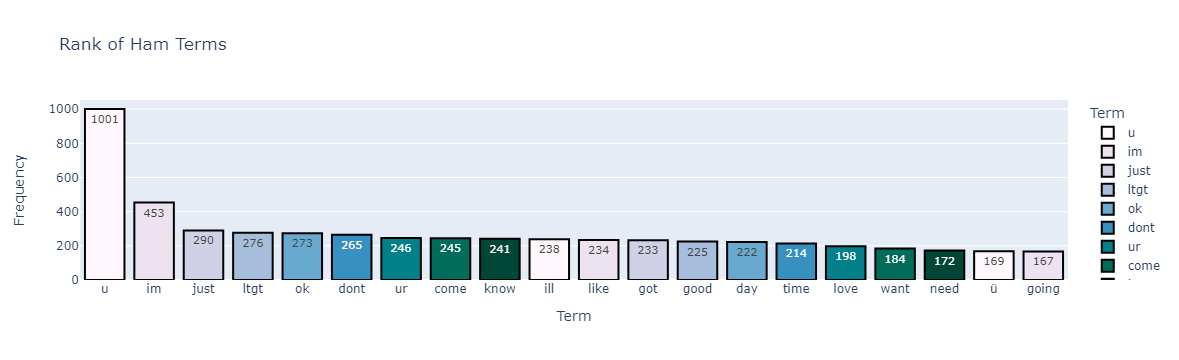

In [14]:
# Rank of Ham Terms
ham = df.loc[df["Category"] == "ham", "Message"].reset_index()
cleanwordlist = []
cleanwordlist_of_list = [clean_up_pipeline(text_row) for text_row in ham["Message"]]
for elem in cleanwordlist_of_list:
    cleanwordlist.extend(elem)

    
freq_df = Freq_df(cleanwordlist)


top_20 = freq_df.head(20)

fig = px.bar(top_20, x = 'Term', y = 'Frequency', text = 'Frequency', color = 'Term',
            color_discrete_sequence = px.colors.sequential.PuBuGn, title = "Rank of Ham Terms")

for idx in range(len(top_20)):
    fig.data[idx].marker.line.width = 2
    fig.data[idx].marker.line.color = "black"
    
fig.update_traces(textposition = 'inside',
                  textfont_size = 11)

fig.show()

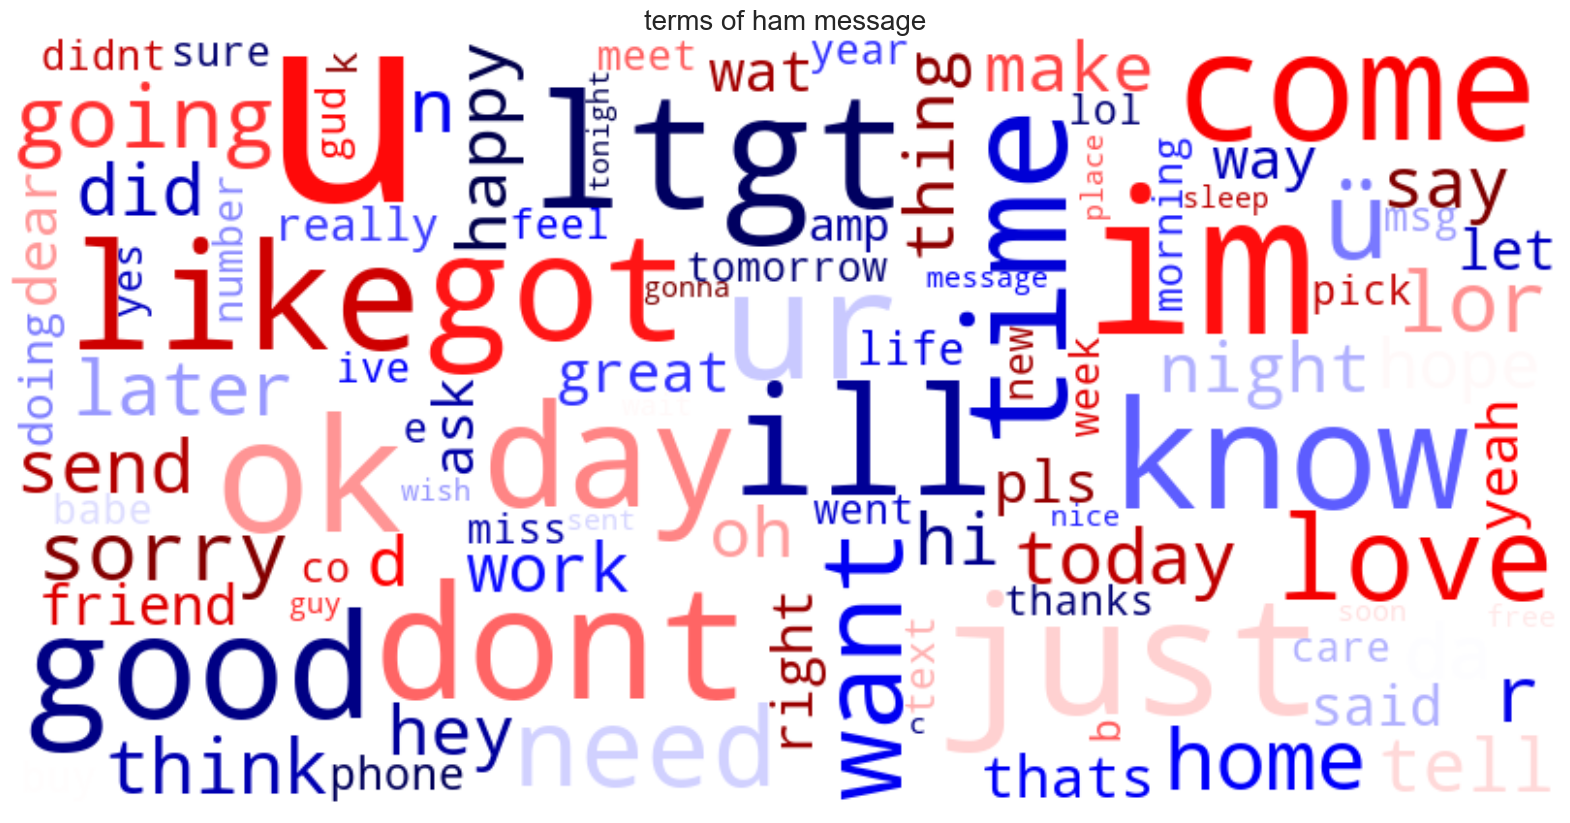

In [15]:
# Word Cloud of ham message
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
# data = freq_df.set_index('Term').to_dict()['Frequency']
data

ham_wordcloud = Word_Cloud(data, 'white', 'seismic', 'terms of ham message')

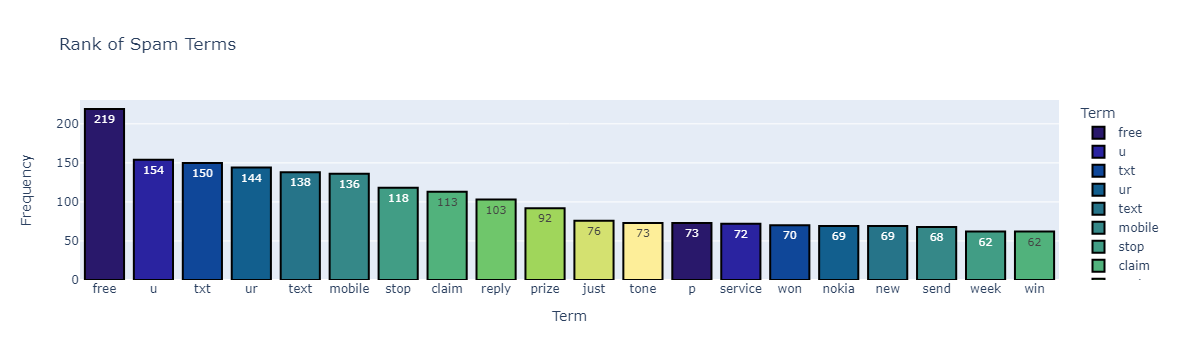

In [16]:
# Rank of Spam Terms
spam = df.loc[df["Category"] == "spam", "Message"].reset_index()
cleanwordlist = []
cleanwordlist_of_list = [clean_up_pipeline(text_row) for text_row in spam["Message"]]
for elem in cleanwordlist_of_list:
    cleanwordlist.extend(elem)
freq_df = Freq_df(cleanwordlist)

top_20 = freq_df.head(20)

fig = px.bar(top_20, x = 'Term', y = 'Frequency', text = 'Frequency', color = 'Term',
            color_discrete_sequence = px.colors.sequential.haline, title = "Rank of Spam Terms")

for idx in range(len(top_20)):
    fig.data[idx].marker.line.width = 2
    fig.data[idx].marker.line.color = "black"
    
fig.update_traces(textposition = 'inside',
                  textfont_size = 11)

fig.show()

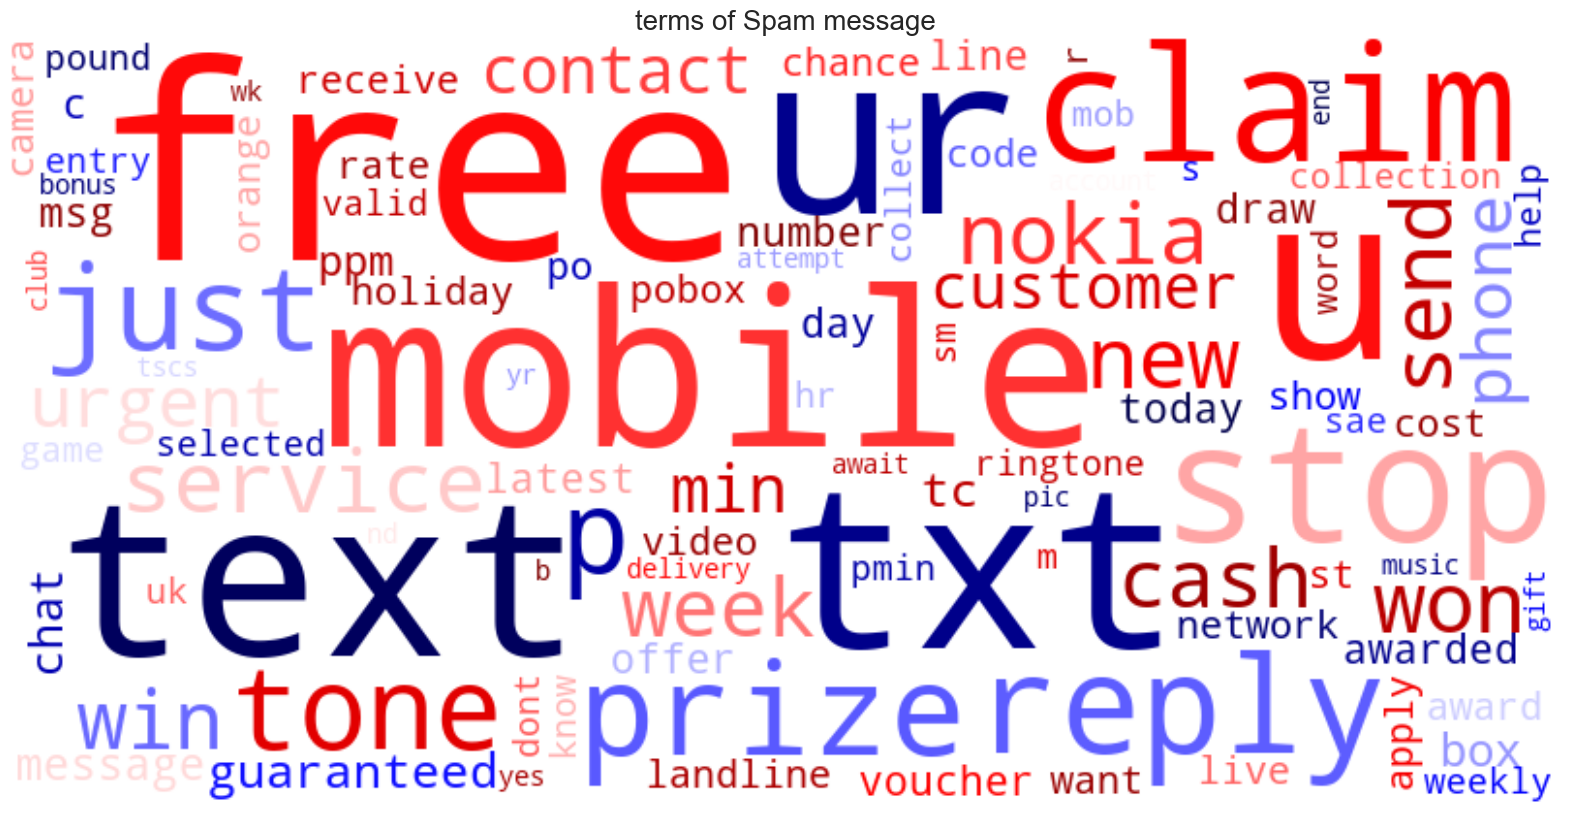

In [17]:
# Word Cloud of ham message
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
# data = freq_df.set_index('Term').to_dict()['Frequency']
data

ham_wordcloud = Word_Cloud(data, 'white', 'seismic', 'terms of Spam message')

## <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:130%;text-align:center;border-radius:20px 70px;">6. Count Vectorizer and TF-IDF</p>

<span style="color:#4e6460"> 
After tokenization, these words need to then be encoded as integers, or floating-point values, for use as inputs in machine learning algorithms. This process is called feature extraction (or vectorization). <br>

Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It will fit and learn the word vocabulary and try to create a document term matrix in which the individual cells denote the frequency of that word in a particular document, which is also known as term frequency, and the columns are dedicated to each word in the corpus.

Term Frequency-Inverse Document Frequency ( TF-IDF) gives a measure that takes the importance of a word into consideration depending on how frequently it occurs in a document and a corpus.

In [18]:
# We will used CountVertorizer built in function in sklearn.feature_extraction.text to convert our text dataframe in to a vertor of term counts
vector = CountVectorizer(analyzer = lambda x: x)
X = vector.fit_transform(clean_words)
X

<5572x7850 sparse matrix of type '<class 'numpy.int64'>'
	with 43151 stored elements in Compressed Sparse Row format>

In [19]:
# We will transform a count matrix to a normalized tf-idf prepresentation
X = TfidfTransformer().fit_transform(X)
X

<5572x7850 sparse matrix of type '<class 'numpy.float64'>'
	with 43151 stored elements in Compressed Sparse Row format>

## <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:130%;text-align:center;border-radius:20px 70px;">7. Classification Models</p>

<span style="color:#4e6460"> 
Binary classifiers will be used to train, test, and predict whether or not a message is spam or an authentic communication. For the purpose of this project several classification algorithms will be used with varied hyperparameters to find the algorithm with the highest accuracy and therefore the best performance. The classification techniques used are: <br>
1. Logistict Regression <br>
2. K-Nearest Neighbours <br>
3. SVC (Linear and RBF) <br>
4. Random Forest <br>
5. AdaBoost <br>
6. ANN

In [20]:
# Changing categorical target variable to dummy variables and assigning features and target to a variable for training and test sets
df = pd.get_dummies(df, columns = ["Category"], drop_first=True)

target = df['Category_spam']
features = X

In [21]:
# Training and Test Set for classification models
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)

In [22]:
# Create a List to contains all the models
models_list = []

# Logistic Regression Hyperparameters
Cs = [0.0001, 1, 1000]
multi_classes = ['auto', 'ovr', 'multinomial']
hyperparams = list(itertools.product(Cs, multi_classes))
# Logsitic Regression bulding models
for C, multi_class in hyperparams:
    model = LogisticRegression(n_jobs= -1, C = C, multi_class = multi_class)
    model_name = "Logistic Regression with C = {}, and multi_class = {}".format(C, multi_class) 
    models_list.append([model_name, model])

# KNN Hyperparameters
leaf_sizes = list(range(1, 3))
n_neighbors = list(range(1, 3))
hyperparams = list(itertools.product(leaf_sizes, n_neighbors))
# KNN building models
for leaf_size, n_neighbor in hyperparams:
    model = KNeighborsClassifier(n_jobs= -1, leaf_size = leaf_size, n_neighbors = n_neighbor)
    model_name = "KNN with leaf_size = {}, and n_neighbor = {}".format(leaf_size, n_neighbor) 
    models_list.append([model_name, model])

# SVC Hyperparameters
gammas = [0.1, 1, 10]
Cs = [0.0001, 1, 1000]
hyperparams = list(itertools.product(gammas, Cs))
# Linear SVC
for gamma, C in hyperparams:
    model = SVC(kernel = "linear", gamma = gamma, C = C)
    model_name = "Linear SVC with gamma = {}, and C = {}".format(gamma, C) 
    models_list.append([model_name, model])
# RBF SVC
for gamma, C in hyperparams:
    model = SVC(kernel = "rbf", gamma = gamma, C = C)
    model_name = "RBF SVC with gamma = {}, and C = {}".format(gamma, C) 
    models_list.append([model_name, model])
    
# Random Forest Hyperparameters
criterions = ["gini", "entropy", "log_loss"]
n_estimators = [100, 150, 200]
hyperparams = list(itertools.product(criterions, n_estimators))
for criterion, n_estimator in hyperparams:
    model = RandomForestClassifier(n_jobs = -1, criterion = criterion, n_estimators = n_estimator)
    model_name = "RandomForestClassifier with criterion = {}, and n_estimators = {}".format(criterion, n_estimator) 
    models_list.append([model_name, model])
    
# AdaBoost Hyperparameters
learning_rates = [0.1, 1, 10]
n_estimators = [100, 150, 200]
hyperparams = list(itertools.product(learning_rates, n_estimators))
for learning_rate, n_estimator in hyperparams:
    model = AdaBoostClassifier(learning_rate = learning_rate, n_estimators = n_estimator)
    model_name = "AdaBoostClassifier with learning_rate = {}, and n_estimators = {}".format(learning_rate, n_estimator) 
    models_list.append([model_name, model])
    
# ANN
first = [300, 200, 100, 50]
second = [200, 100, 50, 25]
for i in range(4):
    model = MLPClassifier(hidden_layer_sizes = (first[i], second[i]), max_iter = 1000, random_state = 42)
    model_name = "MLPClassifier with first layer size = {}, and second layer size = {}".format(first[i], second[i])
    models_list.append([model_name, model])


# # Decision Tree Hyperparameters
# criterions = ["gini", "entropy", "log_loss"]
# splitters = ["best", "random"]
# hyperparams = list(itertools.product(criterions, splitters))
# for criterion, splitter in hyperparams:
#     model = DecisionTreeClassifier(criterion = criterion, splitter = splitter)
#     model_name = "Decision Tree with criterion = {}, and splitter = {}".format(criterion, splitter) 
#     models_list.append([model_name, model])
    
# # Naive Bayes Hyperparameters
# var_smoothings = [1e-10, 1e-8, 1e-6, 1e-4, 1e-2]
# for var_smoothing in var_smoothings:
#     model = GaussianNB(var_smoothing = var_smoothing)
#     model_name = "Naive Bayes with var_smoothing = {}".format(var_smoothing) 
#     models_list.append([model_name, model])
    
# # XGBoost Hyperparameters
# learning_rates = [0.1, 0.5, 1]
# n_estimators = [100, 150, 200]
# hyperparams = list(itertools.product(learning_rates, n_estimators))
# for learning_rate, n_estimator in hyperparams:
#     model = XGBClassifier(n_jobs = -1, learning_rate = learning_rate, n_estimators = n_estimator, use_label_encoder = False)
#     model_name = "XGBClassifier with criterion = {}, and n_estimators = {}".format(learning_rate, n_estimator) 
#     models_list.append([model_name, model])

# # CatBoost Hyperparameters
# learning_rates = [0.1, 0.5, 1]
# iterationses = [5, 10, 20]
# hyperparams = list(itertools.product(learning_rates, iterationses))
# for learning_rate, iterations in hyperparams:
#     model = CatBoostClassifier(learning_rate = learning_rate, iterations = iterations)
#     model_name = "CatBoostClassifier with criterion = {}, and iterations = {}".format(learning_rate, iterations) 
#     models_list.append([model_name, model])

In [23]:
# Create a pipeline for all models with its hyperparameters
scores = []
names = []
pipe_list = []
for model in models_list:
    pipe = Pipeline([
        # ("Matrix Transformer", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
        ("Classifier", model[1])
    ])
    pipe.fit(X_train, Y_train)
    pipe_list.append(pipe)
    score = pipe.score(X_test, Y_test)
    scores.append(score)
    name = model[0]
    names.append(name)

In [24]:
scores_df = pd.DataFrame(zip(names, scores), columns = ["Classifier", "Accuracy"])
pd.set_option('display.max_colwidth', None)
scores_df.sort_values(by= "Accuracy", ascending = False)

Classifier  \
50    MLPClassifier with first layer size = 200, and second layer size = 100   
52      MLPClassifier with first layer size = 50, and second layer size = 25   
51     MLPClassifier with first layer size = 100, and second layer size = 50   
49    MLPClassifier with first layer size = 300, and second layer size = 200   
18                                   Linear SVC with gamma = 1, and C = 1000   
21                                  Linear SVC with gamma = 10, and C = 1000   
15                                 Linear SVC with gamma = 0.1, and C = 1000   
24                                    RBF SVC with gamma = 0.1, and C = 1000   
6                  Logistic Regression with C = 1000, and multi_class = auto   
7                   Logistic Regression with C = 1000, and multi_class = ovr   
8           Logistic Regression with C = 1000, and multi_class = multinomial   
27                                      RBF SVC with gamma = 1, and C = 1000   
14                                    Linear SVC with gamma = 0.1, and C = 1   
17                                      Linear SVC with gamma = 1, and C = 1   
20                                     Linear SVC with gamma = 10, and C = 1   
31      RandomForestClassifier with criterion = gini, and n_estimators = 100   
38  RandomForestClassifier with criterion = log_loss, and n_estimators = 150   
36   RandomForestClassifier with criterion = entropy, and n_estimators = 200   
32      RandomForestClassifier with criterion = gini, and n_estimators = 150   
33      RandomForestClassifier with criterion = gini, and n_estimators = 200   
39  RandomForestClassifier with criterion = log_loss, and n_estimators = 200   
26                                         RBF SVC with gamma = 1, and C = 1   
35   RandomForestClassifier with criterion = entropy, and n_estimators = 150   
37  RandomForestClassifier with criterion = log_loss, and n_estimators = 100   
45         AdaBoostClassifier with learning_rate = 1, and n_estimators = 200   
34   RandomForestClassifier with criterion = entropy, and n_estimators = 100   
43         AdaBoostClassifier with learning_rate = 1, and n_estimators = 100   
5              Logistic Regression with C = 1, and multi_class = multinomial   
44         AdaBoostClassifier with learning_rate = 1, and n_estimators = 150   
42       AdaBoostClassifier with learning_rate = 0.1, and n_estimators = 200   
41       AdaBoostClassifier with learning_rate = 0.1, and n_estimators = 150   
4                      Logistic Regression with C = 1, and multi_class = ovr   
3                     Logistic Regression with C = 1, and multi_class = auto   
23                                       RBF SVC with gamma = 0.1, and C = 1   
11                                KNN with leaf_size = 2, and n_neighbor = 1   
9                                 KNN with leaf_size = 1, and n_neighbor = 1   
40       AdaBoostClassifier with learning_rate = 0.1, and n_estimators = 100   
10                                KNN with leaf_size = 1, and n_neighbor = 2   
12                                KNN with leaf_size = 2, and n_neighbor = 2   
30                                     RBF SVC with gamma = 10, and C = 1000   
29                                        RBF SVC with gamma = 10, and C = 1   
2         Logistic Regression with C = 0.0001, and multi_class = multinomial   
22                                  RBF SVC with gamma = 0.1, and C = 0.0001   
13                               Linear SVC with gamma = 0.1, and C = 0.0001   
28                                   RBF SVC with gamma = 10, and C = 0.0001   
16                                 Linear SVC with gamma = 1, and C = 0.0001   
1                 Logistic Regression with C = 0.0001, and multi_class = ovr   
25                                    RBF SVC with gamma = 1, and C = 0.0001   
19                                Linear SVC with gamma = 10, and C = 0.0001   
0                Logistic Regression with C = 0.0001, and multi_cl

In [25]:
# Selecting the best pipe - Base on the score table above, we have the best pipe as Linear SVC
scores_df.sort_values(by= "Accuracy", ascending = False).head(1)

Classifier  \
50  MLPClassifier with first layer size = 200, and second layer size = 100   

    Accuracy  
50  0.984925

## <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:130%;text-align:center;border-radius:20px 70px;">8. Performance Metrics</p>

<span style="color:#4e6460"> 
A critical step in the life cycle of a machine learning model is the evaluation of its performance.

Two techniques used to evaluate a classification model are the confusion matrix and the classification report.

Confusion Matrix: The confusion matrix is an N x N table (where N is the number of classes) that contains the number of correct and incorrect predictions of the classification model.
The values returned by the confusion matrix are divided into the following categories:
- True Positive (TP):
The model predicted positive, and the real value is positive.
- True Negative (TN):
The model predicted negative, and the real value is negative.
- False Positive (FP):
The model predicted positive, but the real value is negative (Type I error).
- False Negative (FN):
The model predicted negative, but the real value is positive (Type II error).

Classification Report: This is the summary of the quality of classification made by the constructed ML model. The first column is the class label’s name and followed by Precision, Recall, F1-score, and Support.

In [26]:
# Make prediction and analyze its performance by creating the confusion matrix and classification report
best_pipe_index = scores_df.sort_values(by= "Accuracy", ascending = False).head(1).index.values[0]
best_pipe = pipe_list[best_pipe_index]
best_pipe.fit(X_train, Y_train)
Y_pred = best_pipe.predict(X_test)

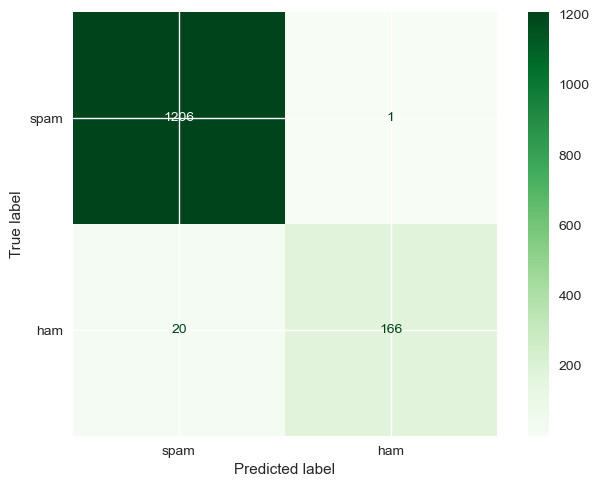

In [27]:
# Confusion Matrix of the best model
data = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=data, display_labels=['spam','ham'])
disp.plot(cmap='Greens')
plt.show()

In [28]:
# Classification Report
cr = classification_report(Y_test, Y_pred, output_dict = True)
cr_df = pd.DataFrame(cr)
cr_df

0           1  accuracy    macro avg  weighted avg
precision     0.983687    0.994012  0.984925     0.988849      0.985065
recall        0.999171    0.892473  0.984925     0.945822      0.984925
f1-score      0.991369    0.940510  0.984925     0.965939      0.984578
support    1207.000000  186.000000  0.984925  1393.000000   1393.000000

## <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:130%;text-align:center;border-radius:20px 70px;">9. Out of Sample Predictions</p>

In this section we will peform prediction using the best model on our new out of sample dataset, to test whether the model work well on completely new data.
The OOS dataset was download from Kaggle.com
https://www.kaggle.com/datasets/vivekchutke/spam-ham-sms-dataset

In [29]:
# Load Out of Sample dataset
df_oos = pd.read_csv('Datasets/Out_Of_Sample_SMS.csv')
df_oos

Category  \
0         ham   
1         ham   
2         ham   
3        spam   
4        spam   
...       ...   
5554      ham   
5555      ham   
5556     spam   
5557     spam   
5558      ham   

                                                                                                                                                                                                                                                    Message  
0                                                                                                                                                                                                         Hope you are having a good week. Just checking in  
1                                                                                                                                                                                                                                   K..give back my thanks.  
2                                                                                                                                                                                                               Am also doing in cbe only. But have to pay.  
3                                                                                                     complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+  
4                                                                                         okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 150ppm  
...                                                                                                                                                                                                                                                     ...  
5554  You are a great role model. You are giving so much and i really wish each day for a miracle but God as a reason for everything and i must say i wish i knew why but i dont. I've looked up to you since i was young and i still do. Have a great day.  
5555                                                                                                                                                               Awesome, I remember the last time we got somebody high for the first time with diesel :V  
5556                                                                                                      If you don't, your prize will go to another customer. T&C at www.t-c.biz 18+ 150p/min Polo Ltd Suite 373 London W1J 6HL Please call back if busy   
5557                                                                                             SMS. ac JSco: Energy is high, but u may not know where 2channel it. 2day ur leadership skills r strong. Psychic? Reply ANS w/question. End? Reply END JSCO  
5558                                                                                                                                                                                                                        Shall call now dear having food  

[5559 rows x 2 columns]

In [30]:
# Clean the messages with our pre-defined function in the Step 4. Text Preprocessing
clean_words_oos = [clean_up_pipeline(text_row) for text_row in df_oos["Message"]]

In [31]:
# We will transform the clean_ord_oss to numerical dataframe with the bag of word build from training dataset
X_oos = vector.transform(clean_words_oos)
X_oos

<5559x7850 sparse matrix of type '<class 'numpy.int64'>'
	with 42668 stored elements in Compressed Sparse Row format>

In [32]:
# We will transform a count matrix to a normalized tf-idf prepresentation
X_oos = TfidfTransformer().fit_transform(X_oos)
X_oos

<5559x7850 sparse matrix of type '<class 'numpy.float64'>'
	with 42668 stored elements in Compressed Sparse Row format>

In [33]:
# Changing categorical target variable to dummy variables and assigning features and target to a variable for training and test sets
df_oos = pd.get_dummies(df_oos, columns = ["Category"], drop_first=True)

target_oos = df_oos['Category_spam']
features_oos = X_oos

In [34]:
# Making prediction using best pipe model algorithms
Y_pred_oos = best_pipe.predict(features_oos)
Y_test_oos = target_oos

In [35]:
Y_pred_oos

array([0, 0, 0, ..., 1, 1, 0], dtype=uint8)

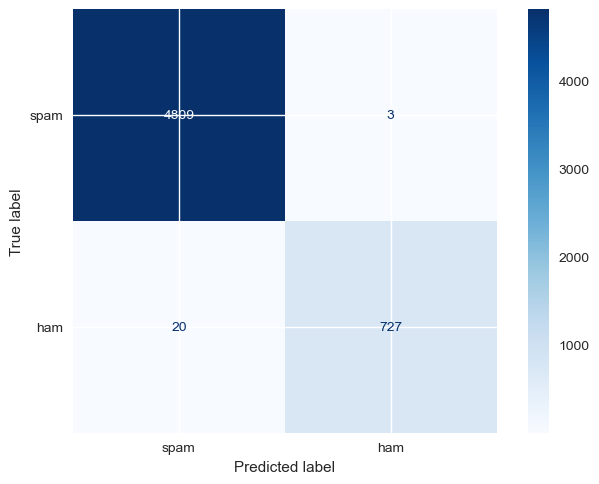

In [36]:
# Confusion Matrix of Out of Sample Dataset
data = confusion_matrix(Y_test_oos, Y_pred_oos)

disp = ConfusionMatrixDisplay(confusion_matrix=data, display_labels=['spam','ham'])
disp.plot(cmap='Blues')

In [37]:
# Classification Report of Out Of Sample dataset
cr = classification_report(Y_test_oos, Y_pred_oos, output_dict = True)
cr_df = pd.DataFrame(cr)
cr_df

0           1  accuracy    macro avg  weighted avg
precision     0.995858    0.995890  0.995863     0.995874      0.995863
recall        0.999377    0.973226  0.995863     0.986301      0.995863
f1-score      0.997614    0.984428  0.995863     0.991021      0.995842
support    4812.000000  747.000000  0.995863  5559.000000   5559.000000

## <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:130%;text-align:center;border-radius:20px 70px;">10. Save the clean Dataset</p>

### The clean dataset after text preprocessing and used on training model is save as csv file bellow

In [38]:
target = df['Category_spam']
features = pd.DataFrame()
for i, col in enumerate(vector.get_feature_names_out()):
    features[col] = pd.arrays.SparseArray(X[:, i].toarray().ravel(), fill_value=0)

In [39]:
df_clean = features
df_clean["Prediction"] = target

In [40]:
df_clean

aa  aah  aaniye  aaooooright  aathilove  aathiwhere   ab  abbey  \
0     0.0  0.0     0.0          0.0        0.0         0.0  0.0    0.0   
1     0.0  0.0     0.0          0.0        0.0         0.0  0.0    0.0   
2     0.0  0.0     0.0          0.0        0.0         0.0  0.0    0.0   
3     0.0  0.0     0.0          0.0        0.0         0.0  0.0    0.0   
4     0.0  0.0     0.0          0.0        0.0         0.0  0.0    0.0   
...   ...  ...     ...          ...        ...         ...  ...    ...   
5567  0.0  0.0     0.0          0.0        0.0         0.0  0.0    0.0   
5568  0.0  0.0     0.0          0.0        0.0         0.0  0.0    0.0   
5569  0.0  0.0     0.0          0.0        0.0         0.0  0.0    0.0   
5570  0.0  0.0     0.0          0.0        0.0         0.0  0.0    0.0   
5571  0.0  0.0     0.0          0.0        0.0         0.0  0.0    0.0   

      abdomen  abeg  ...  zoe  zogtorius  zoom  zouk  zyada    é         ü  \
0         0.0   0.0  ...  0.0        0.0   0.0   0.0    0.0  0.0  0.000000   
1         0.0   0.0  ...  0.0        0.0   0.0   0.0    0.0  0.0  0.000000   
2         0.0   0.0  ...  0.0        0.0   0.0   0.0    0.0  0.0  0.000000   
3         0.0   0.0  ...  0.0        0.0   0.0   0.0    0.0  0.0  0.000000   
4         0.0   0.0  ...  0.0        0.0   0.0   0.0    0.0  0.0  0.000000   
...       ...   ...  ...  ...        ...   ...   ...    ...  ...       ...   
5567      0.0   0.0  ...  0.0        0.0   0.0   0.0    0.0  0.0  0.000000   
5568      0.0   0.0  ...  0.0        0.0   0.0   0.0    0.0  0.0  0.330806   
5569      0.0   0.0  ...  0.0        0.0   0.0   0.0    0.0  0.0  0.000000   
5570      0.0   0.0  ...  0.0        0.0   0.0   0.0    0.0  0.0  0.000000   
5571      0.0   0.0  ...  0.0        0.0   0.0   0.0    0.0  0.0  0.000000   

      üll  〨ud  Prediction  
0     0.0  0.0           0  
1     0.0  0.0           0  
2     0.0  0.0           1  
3     0.0  0.0           0  
4     0.0  0.0           0  
...   ...  ...         ...  
5567  0.0  0.0           1  
5568  0.0  0.0           0  
5569  0.0  0.0           0  
5570  0.0  0.0           0  
5571  0.0  0.0           0  

[5572 rows x 7851 columns]

In [41]:
# df_clean.to_csv("Datasets/Cleaned_Message_1.csv", index=False)